## Trabajo Lucia Rodriguez Fernandez

### Evolución del paro por grupos de edad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np

import re
import datetime as DT

In [2]:
def df_quarter(date):
    q = {'1':'-03-31', '2':'-06-30', '3':'-09-30', '4':'-12-31'}
    date = re.sub('T(\d)', lambda match, q=q: q[match.group(1)], date)
    return DT.datetime.strptime(date, '%Y-%m-%d')

In [ ]:
paro_df = pd.read_csv("4247.csv",
                    sep = ';', 
                    decimal = ',',
                    na_values=[".."],
                    parse_dates=[3],
                    date_parser=df_quarter)
paro_df.columns = ['Sexo','ccaa','Edad','Periodo','Total' ]
paro_df['month'] = pd.DatetimeIndex(paro_df['Periodo']).month #le añado month para futuros filtros
paro_df['year'] = pd.DatetimeIndex(paro_df['Periodo']).year #le añado year para futuros filtros
paro_df["code"], paro_df["ccaa"] = paro_df["ccaa"].str.split(" ", 1).str
#paro_df.info()

fmt = '%.0f%%' # Formato de los ticks'

#print(paro_df)


## Visualización Seaborn 1: Evolución del paro por grupos de edad

### Seaborn

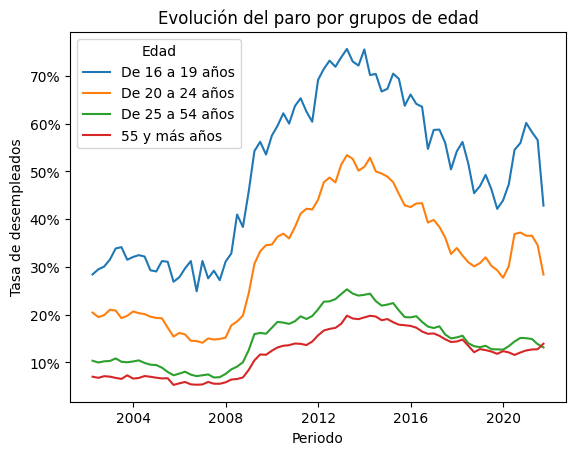

In [4]:
paroq_df = paro_df[(paro_df['Sexo'] == 'Ambos sexos')
                & (paro_df['Edad'] != 'Total')
                & (paro_df['ccaa'] == 'Nacional')
                & (paro_df['Edad'] != 'Menores de 25 años')
                & (paro_df['Edad'] != '25 y más años')] #filtramos datos

ax = sns.lineplot(data=paroq_df, x="Periodo", y="Total", hue="Edad")

yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
plt.title("Evolución del paro por grupos de edad")
plt.xlabel("Periodo")
plt.ylabel("Tasa de desempleados")
plt.rcParams["figure.figsize"]=[10,6]
plt.show()

### Matplotlib

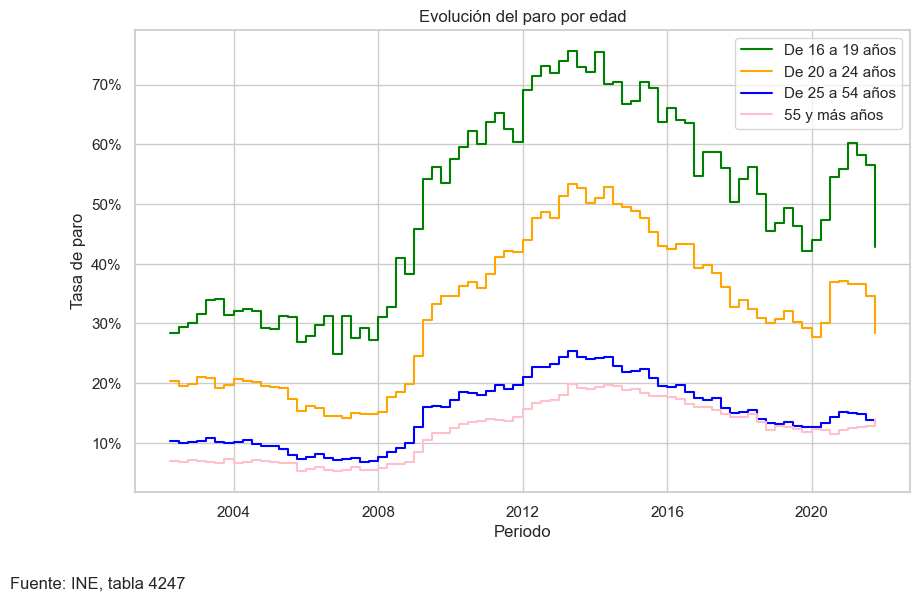

In [200]:
paroq_df = paro_df[(paro_df['Sexo'] == 'Ambos sexos')
                & (paro_df['Edad'] != 'Total')
                & (paro_df['ccaa'] == 'Nacional')
                & (paro_df['Edad'] != 'Menores de 25 años')
                & (paro_df['Edad'] != '25 y más años')] #filtramos datos


edades = pd.unique(paroq_df['Edad']).tolist() # Obtenemos la lista para iterar
fuente= "Fuente: INE, tabla 4247"
paleta_edad = {'De 16 a 19 años':'green',
               'De 20 a 24 años':'orange',
               'De 25 a 54 años':'blue',
               '55 y más años':'pink'} # dict para asignar color

fmt = '%.0f%%' # Formato de los ticks'

fig, ax = plt.subplots () # Creamos el contenedor y el eje
for edad in edades: # Iteramos por género
    x = paroq_df[paroq_df['Edad'] == edad].Periodo # Valor eje x
    y = paroq_df[paroq_df['Edad'] == edad].Total #valor eje y
    
    color=paleta_edad[edad] #color línea
    ax.step(x, y, label=edad, color=color) # Pintamos la gráfica


yticks = mtick.FormatStrFormatter(fmt) # Definimos el formato % al eje y 
ax.yaxis.set_major_formatter(yticks) # Aplicamos formato % al eje y
ax.set_title("Evolución del paro por edad")  # Añadimos título
ax.set_xlabel('Periodo') # Añadimos etiqueta eje x
ax.set_ylabel('Tasa de paro') # Añadimos etiqueta eje y
ax.legend()  # Añadimos leyenda.
plt.figtext(x=0,y=-.05,s=fuente,ha='left') #añadimos el caption manualmente
plt.rcParams["figure.figsize"]=[10,6]
plt.show()

## Visualización 2: Pirámide de paro por sexo, desglosada por CCAA para un trimestre determinado

### Seaborn

In [ ]:
paroq_df = paro_df[(paro_df['Sexo'] != 'Ambos sexos')
                & (paro_df['Edad'] == 'Total')
                & (paro_df['ccaa'] != 'Nacional')
                & (paro_df["year"] == 2021)
                & (paro_df["month"] >= 1) & (paro_df["month"] <= 3)] #filtramos datos


paro_hombres = paroq_df[paro_df['Sexo'] == 'Hombres']
paro_mujeres = paroq_df[paro_df['Sexo'] == 'Mujeres']

paro_ccaa_hombres = paro_hombres.groupby('ccaa')['Total'].mean()
paro_ccaa_mujeres = paro_mujeres.groupby('ccaa')['Total'].mean()

ax = sns.barplot(x=paro_ccaa_hombres, y=paro_ccaa_hombres.index, color='blue', label='Hombres')
sns.barplot(x=-paro_ccaa_mujeres, y=paro_ccaa_mujeres.index, color='purple', label='Mujeres')

xticks = mtick.FormatStrFormatter(fmt)  # Definimos el formato % al eje x
ax.xaxis.set_major_formatter(xticks)  # Aplicamos formato % al eje x

plt.title("Pirámide de paro por sexo, desglosada por CCAA")
plt.xlabel("Tasa de desempleados")
plt.ylabel("Comunidades y Ciudades Autónomas")
plt.show()

### Matplotlib

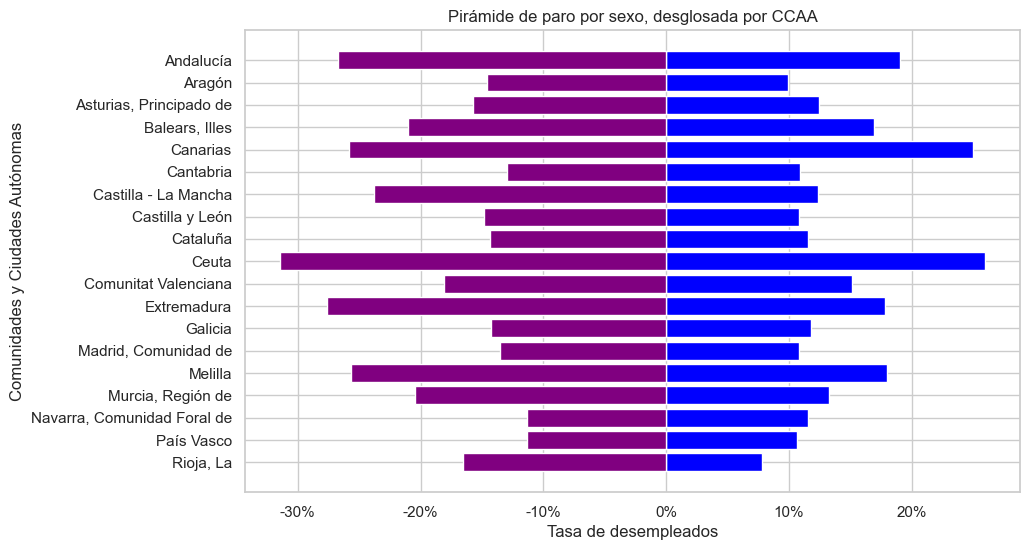

In [207]:

# Crear el gráfico de barras
fig, ax = plt.subplots()

index = np.arange(len(paro_por_ccaa_hombres))

index = index[::-1]

# Graficar las barras de hombres
ax.barh(index, paro_por_ccaa_hombres, color='blue', label='Hombres')

# Graficar las barras de mujeres
ax.barh(index, -paro_por_ccaa_mujeres, color='purple', label='Mujeres')

# Configurar los ejes y título del gráfico
ax.set_title("Pirámide de paro por sexo, desglosada por CCAA")
ax.set_xlabel("Tasa de desempleados")
ax.set_ylabel("Comunidades y Ciudades Autónomas")

# Configurar las etiquetas de las comunidades y ciudades autónomas
ax.set_yticks(index)
ax.set_yticklabels(paro_por_ccaa_hombres.index)
ax.xaxis.set_major_formatter(xticks)  # Aplicamos formato % al eje x

# Mostrar el gráfico
plt.show()


## Visualización 3: Diagrama Dumbbell del paro total por CCAA con inicio en 2002 y fin en 2021

### Seaborn

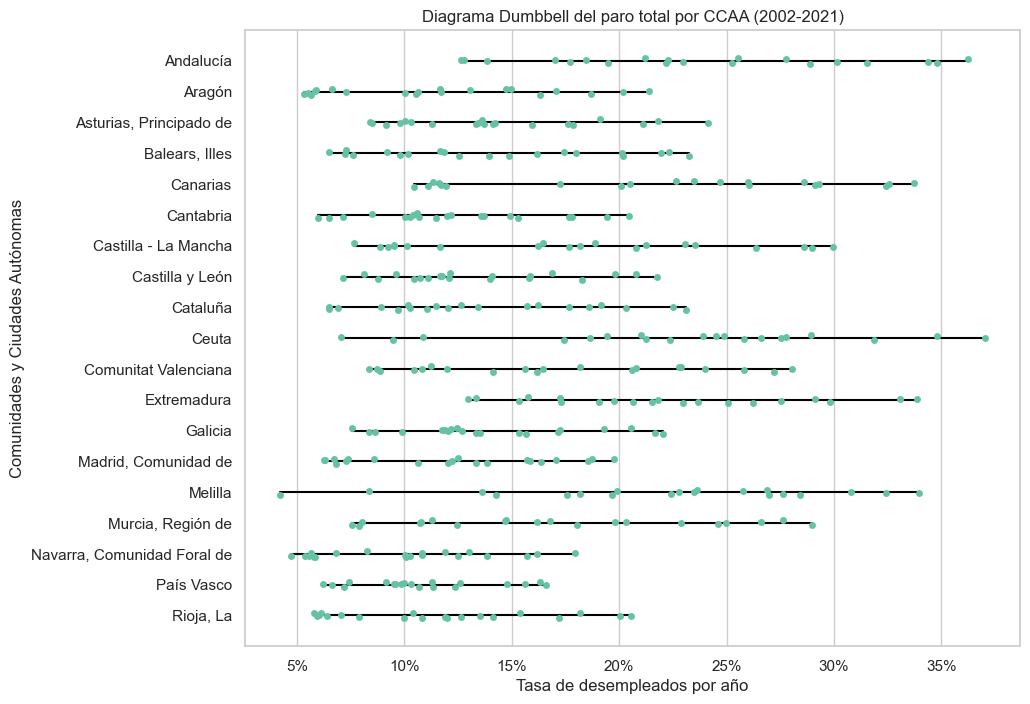

In [208]:
paroq_df = paro_df[(paro_df['Sexo'] == 'Ambos sexos')
                & (paro_df['Edad'] == 'Total')
                & (paro_df['ccaa'] != 'Nacional')
                & (paro_df["year"] >= 2002) & (paro_df["year"] <= 2021)] #filtramos datos

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.set_palette("Set2")

paro_por_ccaa = paroq_df.groupby(['ccaa','year'])['Total'].mean().reset_index()

ax = sns.stripplot(data=paro_por_ccaa, x="Total", y="ccaa", orient="h", dodge=True)

for ccaa in paro_por_ccaa['ccaa'].unique():
    ccaa_data = paro_por_ccaa[paro_por_ccaa['ccaa'] == ccaa]
    min_value = ccaa_data['Total'].min()
    max_value = ccaa_data['Total'].max()
    plt.plot([min_value, max_value], [ccaa, ccaa], color='black')


ax.xaxis.set_major_formatter(xticks)  # Aplicamos formato % al eje x
plt.title("Diagrama Dumbbell del paro total por CCAA (2002-2021)")
plt.xlabel("Tasa de desempleados por año")
plt.ylabel("Comunidades y Ciudades Autónomas")
plt.show()

### Matplotlib

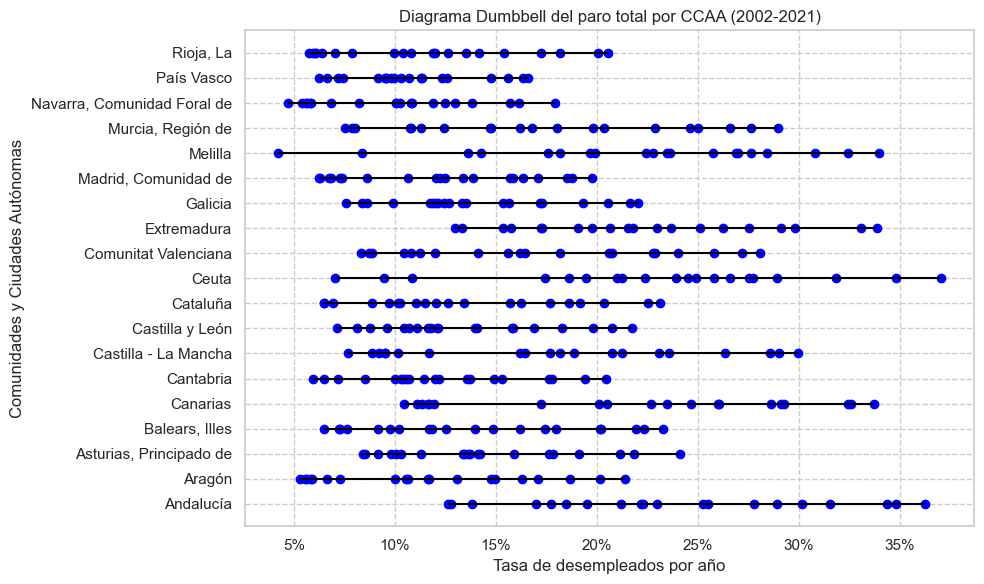

In [212]:
fig, ax = plt.subplots ()
plt.grid(True, linestyle='--')

for ccaa in paro_por_ccaa['ccaa'].unique():
    ccaa_data = paro_por_ccaa[paro_por_ccaa['ccaa'] == ccaa]
    min_value = ccaa_data['Total'].min()
    max_value = ccaa_data['Total'].max()
    plt.plot([min_value, max_value], [ccaa, ccaa], color='black')

plt.scatter(paro_por_ccaa['Total'], paro_por_ccaa['ccaa'], color='blue')

plt.title("Diagrama Dumbbell del paro total por CCAA (2002-2021)")
plt.xlabel("Tasa de desempleados por año")
plt.ylabel("Comunidades y Ciudades Autónomas")
ax.xaxis.set_major_formatter(xticks)  # Aplicamos formato % al eje x
plt.tight_layout()
plt.show()